# Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('titanic.csv')

In [3]:
df=pd.DataFrame(ds)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df.shape

(891, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label=LabelEncoder()
df.Sex=label.fit_transform(df.Sex)

In [11]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
df.Age=df.Age.replace(np.NaN,df.Age.mean())

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
df.Embarked=label.fit_transform(df.Embarked)

In [19]:
df.Embarked.unique()

array([2, 0, 1])

In [20]:
df.Sex.value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [21]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

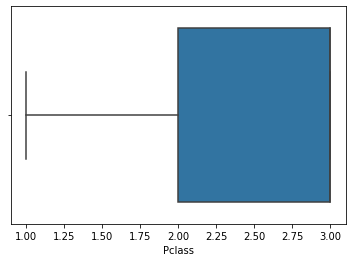

In [22]:
sns.boxplot(df.Pclass)

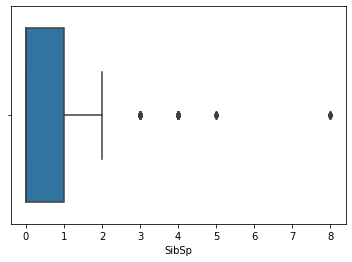

In [23]:
sns.boxplot(df.SibSp)

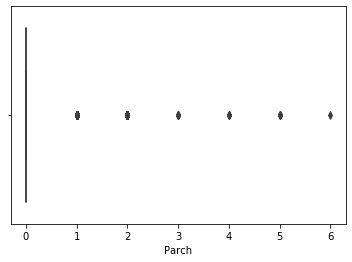

In [24]:
sns.boxplot(df.Parch)

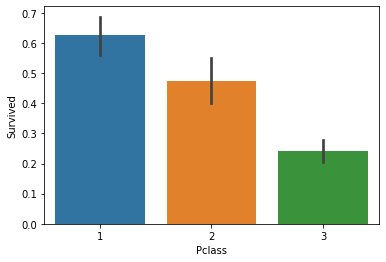

In [25]:
sns.barplot(df.Pclass,df.Survived)

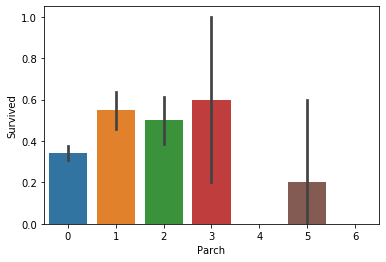

In [26]:
sns.barplot(df.Parch,df.Survived)

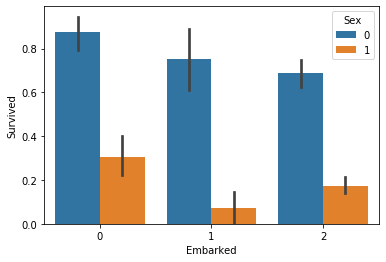

In [27]:
sns.barplot(df.Embarked,df.Survived,data=df,hue='Sex')

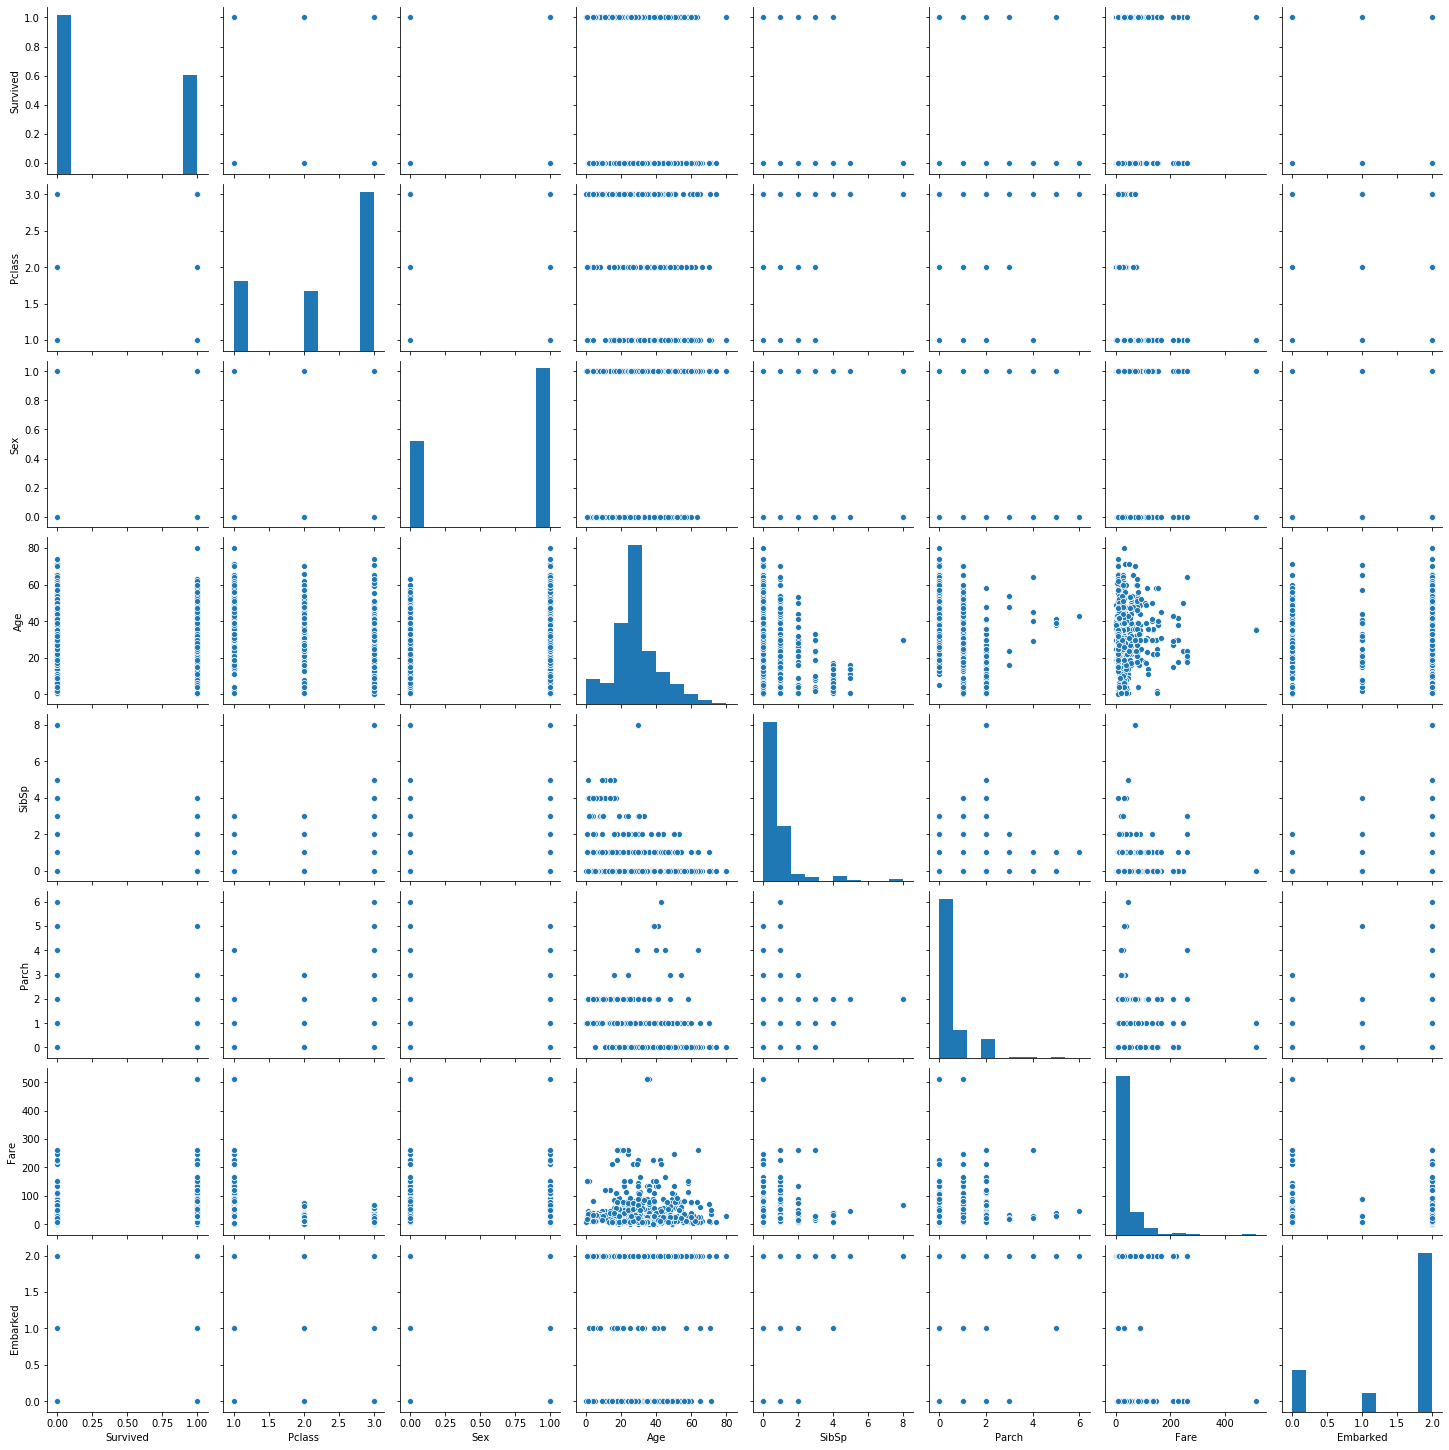

In [28]:
sns.pairplot(df)

(array([732., 104.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

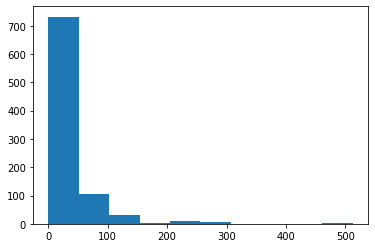

In [29]:
plt.hist(df.Fare)

In [30]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.653446,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [31]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


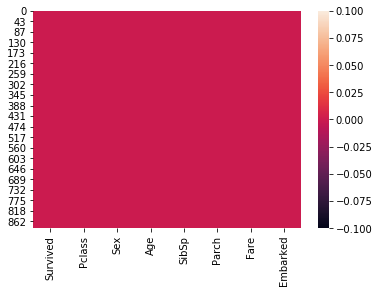

In [32]:
sns.heatmap(df.isnull())

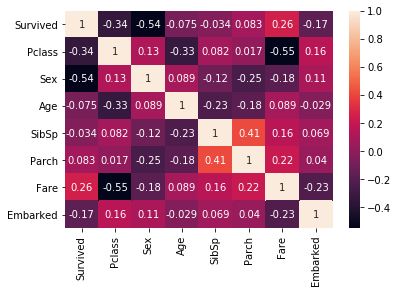

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
x=df.iloc[:,1:8]
y=df.iloc[:,0]

In [35]:
x.shape

(889, 7)

In [36]:
y.shape

(889,)

In [37]:
y=y.values.reshape(y.shape[0],1)

In [38]:
y.shape

(889, 1)

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(x))

In [41]:
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
       118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
       298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
       526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
       688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
       823, 844, 848, 849, 856, 861, 883], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


In [42]:
x.shape

(889, 7)

In [43]:
y.shape

(889, 1)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scale=StandardScaler()

In [46]:
x=scale.fit_transform(x)

# Logistic Regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
max_score=0
for r in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy score of at',r,'is',acc)
    if acc>max_score:
        max_score=acc
        random_state=r
        
print('\n')
print(max_score)
print(random_state)

accuracy score of at 42 is 0.7902621722846442
accuracy score of at 43 is 0.8352059925093633
accuracy score of at 44 is 0.7902621722846442
accuracy score of at 45 is 0.7677902621722846
accuracy score of at 46 is 0.7902621722846442
accuracy score of at 47 is 0.7865168539325843
accuracy score of at 48 is 0.7902621722846442
accuracy score of at 49 is 0.7752808988764045
accuracy score of at 50 is 0.8127340823970037
accuracy score of at 51 is 0.8014981273408239
accuracy score of at 52 is 0.7715355805243446
accuracy score of at 53 is 0.7902621722846442
accuracy score of at 54 is 0.7565543071161048
accuracy score of at 55 is 0.8202247191011236
accuracy score of at 56 is 0.797752808988764
accuracy score of at 57 is 0.7940074906367042
accuracy score of at 58 is 0.7715355805243446
accuracy score of at 59 is 0.7790262172284644
accuracy score of at 60 is 0.797752808988764
accuracy score of at 61 is 0.7715355805243446
accuracy score of at 62 is 0.8127340823970037
accuracy score of at 63 is 0.7827715

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)


In [50]:
accuracy_score(y_test,pred)

0.8352059925093633

In [51]:
confusion_matrix(y_test,pred)

array([[147,  17],
       [ 27,  76]], dtype=int64)

In [52]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87       164\n           1       0.82      0.74      0.78       103\n\n    accuracy                           0.84       267\n   macro avg       0.83      0.82      0.82       267\nweighted avg       0.83      0.84      0.83       267\n'

# Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
max_score=0
for r in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r)
    gb=GaussianNB()
    gb.fit(x_train,y_train)
    pred=gb.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy score of at',r,'is',acc)
    if acc>max_score:
        max_score=acc
        random_state=r
        
print('\n')
print(max_score)
print(random_state)

accuracy score of at 42 is 0.7827715355805244
accuracy score of at 43 is 0.8352059925093633
accuracy score of at 44 is 0.7865168539325843
accuracy score of at 45 is 0.7902621722846442
accuracy score of at 46 is 0.7602996254681648
accuracy score of at 47 is 0.7752808988764045
accuracy score of at 48 is 0.797752808988764
accuracy score of at 49 is 0.7827715355805244
accuracy score of at 50 is 0.8202247191011236
accuracy score of at 51 is 0.8127340823970037
accuracy score of at 52 is 0.7715355805243446
accuracy score of at 53 is 0.7940074906367042
accuracy score of at 54 is 0.7565543071161048
accuracy score of at 55 is 0.7902621722846442
accuracy score of at 56 is 0.7902621722846442
accuracy score of at 57 is 0.7752808988764045
accuracy score of at 58 is 0.7565543071161048
accuracy score of at 59 is 0.7752808988764045
accuracy score of at 60 is 0.7827715355805244
accuracy score of at 61 is 0.7602996254681648
accuracy score of at 62 is 0.8164794007490637
accuracy score of at 63 is 0.779026

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)
gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)


In [56]:
accuracy_score(y_test,pred)

0.8352059925093633

In [57]:
confusion_matrix(y_test,pred)

array([[147,  17],
       [ 27,  76]], dtype=int64)

In [58]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87       164\n           1       0.82      0.74      0.78       103\n\n    accuracy                           0.84       267\n   macro avg       0.83      0.82      0.82       267\nweighted avg       0.83      0.84      0.83       267\n'

# SVC

In [59]:
from sklearn.svm import SVC

In [60]:
max_score=0
for r in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r)
    svc=SVC()
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy score of at',r,'is',acc)
    if acc>max_score:
        max_score=acc
        random_state=r
        
print('\n')
print(max_score)
print(random_state)

accuracy score of at 42 is 0.8202247191011236
accuracy score of at 43 is 0.8539325842696629
accuracy score of at 44 is 0.8277153558052435
accuracy score of at 45 is 0.7940074906367042
accuracy score of at 46 is 0.7902621722846442
accuracy score of at 47 is 0.8202247191011236
accuracy score of at 48 is 0.8314606741573034
accuracy score of at 49 is 0.8089887640449438
accuracy score of at 50 is 0.8239700374531835
accuracy score of at 51 is 0.8277153558052435
accuracy score of at 52 is 0.8052434456928839
accuracy score of at 53 is 0.8127340823970037
accuracy score of at 54 is 0.797752808988764
accuracy score of at 55 is 0.8314606741573034
accuracy score of at 56 is 0.8127340823970037
accuracy score of at 57 is 0.8239700374531835
accuracy score of at 58 is 0.797752808988764
accuracy score of at 59 is 0.8089887640449438
accuracy score of at 60 is 0.8014981273408239
accuracy score of at 61 is 0.7940074906367042
accuracy score of at 62 is 0.850187265917603
accuracy score of at 63 is 0.79775280

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=81)
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)


In [62]:
accuracy_score(y_test,pred)

0.8614232209737828

In [63]:
confusion_matrix(y_test,pred)

array([[158,  10],
       [ 27,  72]], dtype=int64)

# Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
max_score=0
for r in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy score of at',r,'is',acc)
    if acc>max_score:
        max_score=acc
        random_state=r
        
print('\n')
print(max_score)
print(random_state)

accuracy score of at 42 is 0.7602996254681648
accuracy score of at 43 is 0.7715355805243446
accuracy score of at 44 is 0.7865168539325843
accuracy score of at 45 is 0.7528089887640449
accuracy score of at 46 is 0.7752808988764045
accuracy score of at 47 is 0.7715355805243446
accuracy score of at 48 is 0.7790262172284644
accuracy score of at 49 is 0.7565543071161048
accuracy score of at 50 is 0.7752808988764045
accuracy score of at 51 is 0.8127340823970037
accuracy score of at 52 is 0.7677902621722846
accuracy score of at 53 is 0.7827715355805244
accuracy score of at 54 is 0.7902621722846442
accuracy score of at 55 is 0.7790262172284644
accuracy score of at 56 is 0.8052434456928839
accuracy score of at 57 is 0.7715355805243446
accuracy score of at 58 is 0.7752808988764045
accuracy score of at 59 is 0.7752808988764045
accuracy score of at 60 is 0.7902621722846442
accuracy score of at 61 is 0.7677902621722846
accuracy score of at 62 is 0.7790262172284644
accuracy score of at 63 is 0.77153

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=svc.predict(x_test)


In [67]:
accuracy_score(y_test,pred)

0.8689138576779026

In [68]:
confusion_matrix(y_test,pred)

array([[156,  10],
       [ 25,  76]], dtype=int64)

# KNeighbors Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
max_score=0
for r in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r)
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy score of at',r,'is',acc)
    if acc>max_score:
        max_score=acc
        random_state=r
        
print('\n')
print(max_score)
print(random_state)

accuracy score of at 42 is 0.7902621722846442
accuracy score of at 43 is 0.8352059925093633
accuracy score of at 44 is 0.7827715355805244
accuracy score of at 45 is 0.7902621722846442
accuracy score of at 46 is 0.7827715355805244
accuracy score of at 47 is 0.7752808988764045
accuracy score of at 48 is 0.8014981273408239
accuracy score of at 49 is 0.7865168539325843
accuracy score of at 50 is 0.797752808988764
accuracy score of at 51 is 0.8052434456928839
accuracy score of at 52 is 0.7865168539325843
accuracy score of at 53 is 0.7827715355805244
accuracy score of at 54 is 0.7790262172284644
accuracy score of at 55 is 0.8202247191011236
accuracy score of at 56 is 0.8202247191011236
accuracy score of at 57 is 0.7865168539325843
accuracy score of at 58 is 0.8014981273408239
accuracy score of at 59 is 0.8052434456928839
accuracy score of at 60 is 0.797752808988764
accuracy score of at 61 is 0.7640449438202247
accuracy score of at 62 is 0.846441947565543
accuracy score of at 63 is 0.81647940

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=57)
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)


In [72]:
accuracy_score(y_test,pred)

0.7865168539325843

In [73]:
confusion_matrix(y_test,pred)

array([[135,  23],
       [ 34,  75]], dtype=int64)

# CrossValidation

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
score=cross_val_score(lg,x,y,cv=5).mean()
score

0.7851901225163461

In [76]:
score=cross_val_score(gb,x,y,cv=5).mean()
score

0.7907890560528154

In [77]:
score=cross_val_score(kn,x,y,cv=5).mean()
score

0.8020504030978227

In [78]:
score=cross_val_score(svc,x,y,cv=5).mean()
score

0.8268139402018664

In [79]:
score=cross_val_score(dtc,x,y,cv=5).mean()
score

0.7660889989208404

here we can see that svc model score is better than other classifier so we select the svc model

In [80]:
from sklearn.externals import joblib

In [81]:
joblib.dump(svc,'svc_model_titanic_dataset.obj')

['svc_model_titanic_dataset.obj']

In [82]:
joblib.load('svc_model_titanic_dataset.obj')

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)